In [1]:
import os
import pickle
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from collections import Counter
from sklearn import tree

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [4]:
data

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1097,24,71.000,1,0,0,100,0,1,...,1,1,2,0,364,475,734,1,770,802
528,1,154,21,52.300,1,0,0,90,0,1,...,1,1,2,0,415,181,84,1,949,666
529,1,588,16,63.000,1,0,0,100,0,1,...,1,1,3,0,299,214,124,1,546,471
530,0,395,17,102.967,1,0,0,100,0,1,...,1,1,3,0,373,218,-1,0,1759,1030


In [5]:
data.shape[1]

23

In [6]:
for i in range(data.shape[1]):
    print("{0} : {1}".format(i+1, data.columns[i]))

1 : censor
2 : event
3 : age
4 : wtkg
5 : hemo
6 : homo
7 : drugs
8 : karnof
9 : oprior
10 : z30
11 : zprior
12 : preanti
13 : race
14 : gender
15 : str2
16 : strat
17 : symptom
18 : cd40
19 : cd420
20 : cd496
21 : r
22 : cd80
23 : cd820


In [7]:
Counter(data['censor'])

Counter({0: 351, 1: 181})

In [8]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [9]:
Y = data['censor']

In [10]:
X = data.drop(columns='censor')

In [11]:
X.shape

(532, 22)

In [12]:
Y.shape

(532,)

In [13]:
idx = list(range(X.shape[0]))

train_idx, test_idx = train_test_split(idx, test_size= 0.3, random_state=2024)

In [14]:
print("Train data: {}".format(len(train_idx)))
print("Test data: {}".format(len(test_idx)))
print("Train Y data: {}".format(Counter(Y[train_idx])))
print("Test Y data: {}".format(Counter(Y[test_idx])))


Train data: 372
Test data: 160
Train Y data: Counter({0: 248, 1: 124})
Test Y data: Counter({0: 103, 1: 57})


In [15]:
for i in range(2, 11):
    print("Depth :{}".format(i))
    
    model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model.fit(X.iloc[train_idx], Y.iloc[train_idx])
    
    y_pred_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(Y.iloc[train_idx], y_pred_train)
    print("Train confusion matrix")
    print(cm_train)
    print("Train Acc : {}".format((cm_train[0, 0] + cm_train[1, 1])/cm_train.sum()))
    print("Train F1-score : {}\n".format(f1_score(Y.iloc[train_idx], y_pred_train)))
    
    y_pred_test = model.predict(X.iloc[test_idx])
    cm_test = confusion_matrix(Y.iloc[test_idx], y_pred_test)
    print("Test confusion")
    print(cm_test)
    print("Test Acc : {}".format((cm_test[0, 0] + cm_test[1, 1])/cm_test.sum()))
    print("Test F1-score : {}".format(f1_score(Y.iloc[test_idx], y_pred_test)))
    
    print("-------------------------------------------------------------------")
    print("-------------------------------------------------------------------")

Depth :2
Train confusion matrix
[[239   9]
 [ 53  71]]
Train Acc : 0.8333333333333334
Train F1-score : 0.6960784313725491

Test confusion
[[99  4]
 [17 40]]
Test Acc : 0.86875
Test F1-score : 0.792079207920792
-------------------------------------------------------------------
-------------------------------------------------------------------
Depth :3
Train confusion matrix
[[202  46]
 [  4 120]]
Train Acc : 0.8655913978494624
Train F1-score : 0.8275862068965517

Test confusion
[[81 22]
 [ 6 51]]
Test Acc : 0.825
Test F1-score : 0.7846153846153846
-------------------------------------------------------------------
-------------------------------------------------------------------
Depth :4
Train confusion matrix
[[231  17]
 [ 20 104]]
Train Acc : 0.9005376344086021
Train F1-score : 0.8489795918367348

Test confusion
[[95  8]
 [16 41]]
Test Acc : 0.85
Test F1-score : 0.7735849056603773
-------------------------------------------------------------------
---------------------------------

In [16]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(X.iloc[train_idx], Y.iloc[train_idx])

DecisionTreeClassifier(max_depth=2)

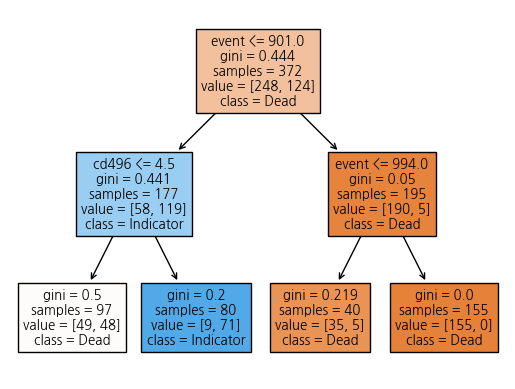

In [17]:
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names = ['Dead', 'Indicator'])
plt.rcParams['figure.figsize'] = [30, 10]

In [18]:
y_pred_train = model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pred_train)
print("Train confusion matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0, 0] + cm_train[1, 1])/cm_train.sum()))
print("Train F1-score : {}\n".format(f1_score(Y.iloc[train_idx], y_pred_train)))

y_pred_test = model.predict(X.iloc[test_idx])
cm_test = confusion_matrix(Y.iloc[test_idx], y_pred_test)
print("Test confusion")
print(cm_test)
print("Test Acc : {}".format((cm_test[0, 0] + cm_test[1, 1])/cm_test.sum()))
print("Test F1-score : {}".format(f1_score(Y.iloc[test_idx], y_pred_test)))

print("-------------------------------------------------------------------")
print("-------------------------------------------------------------------")

Train confusion matrix
[[239   9]
 [ 53  71]]
Train Acc : 0.8333333333333334
Train F1-score : 0.6960784313725491

Test confusion
[[99  4]
 [17 40]]
Test Acc : 0.86875
Test F1-score : 0.792079207920792
-------------------------------------------------------------------
-------------------------------------------------------------------


In [31]:
estimators = [10, 20, 30, 40, 50, 60]
depth = [4, 5, 10, 15]

save_est = []
save_depth = []
f1_score_ = []

cnt = 0
for est in estimators:
    for dep in depth:
        print(">>> {} <<<".format(cnt))
        cnt += 1
        print("Number of estimators : {}, Max Depth : {}".format(est, dep))
        
        model = RandomForestClassifier(n_estimators=est, max_depth=dep, random_state=119,
                                       criterion='gini', max_features='auto', bootstrap=True,
                                       oob_score=False)
        model.fit(X.iloc[train_idx], Y.iloc[train_idx])
        
        y_pred_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(Y.iloc[train_idx], y_pred_train)
        print("Train confusion matrix")
        print(cm_train)
        print("Train accuracy: {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
        print("F1 score: {}".format(f1_score(Y.iloc[train_idx], y_pred_train)))
        
        y_pred_test = model.predict(X.iloc[test_idx])
        cm_test = confusion_matrix(Y.iloc[test_idx], y_pred_test)
        print("Test confusion matrix")
        print(cm_test)
        print("Test accuracy: {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
        print("F1 score: {}".format(f1_score(Y.iloc[test_idx], y_pred_test)))
        
        print("-------------------------------------------------------------------")
        print("-------------------------------------------------------------------")    
        
        save_est.append(est)
        save_depth.append(dep)
        f1_score_.append(f1_score(Y.iloc[test_idx], y_pred_test))

>>> 0 <<<
Number of estimators : 10, Max Depth : 4
Train confusion matrix
[[226  22]
 [ 15 109]]
Train accuracy: 0.9005376344086021
F1 score: 0.8549019607843138
Test confusion matrix
[[96  7]
 [14 43]]
Test accuracy: 0.86875
F1 score: 0.8037383177570094
-------------------------------------------------------------------
-------------------------------------------------------------------
>>> 1 <<<
Number of estimators : 10, Max Depth : 5
Train confusion matrix
[[233  15]
 [ 13 111]]
Train accuracy: 0.9247311827956989
F1 score: 0.8880000000000001
Test confusion matrix
[[98  5]
 [16 41]]
Test accuracy: 0.86875
F1 score: 0.7961165048543689
-------------------------------------------------------------------
-------------------------------------------------------------------
>>> 2 <<<
Number of estimators : 10, Max Depth : 10
Train confusion matrix
[[248   0]
 [  0 124]]
Train accuracy: 1.0
F1 score: 1.0
Test confusion matrix
[[95  8]
 [18 39]]
Test accuracy: 0.8375
F1 score: 0.7499999999999